In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts
dataset = pd.read_csv("Churn.csv", sep=";")
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", 
                   "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario",
                   "Saiu"]

In [2]:
dataset.shape

(999, 12)

In [3]:
agrupado = dataset.groupby(['Estado']).size()

<AxesSubplot:xlabel='Estado'>

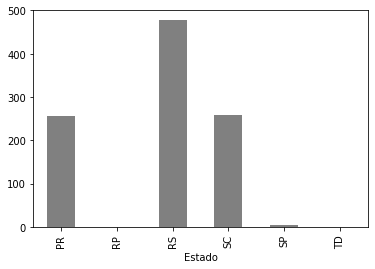

In [4]:
agrupado.plot.bar(color='gray')

In [5]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [12]:
dataset['Score'].describe()

count    998.000000
mean     648.605210
std       98.312117
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

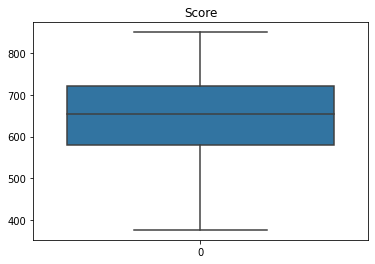

In [13]:
srn.boxplot(data=dataset['Score']).set_title('Score')

c:\users\mello\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Score')

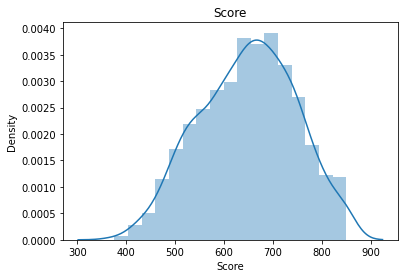

In [14]:
srn.distplot(dataset['Score']).set_title('Score')

In [15]:
dataset['Idade'].describe()

count    998.000000
mean      38.908818
std       10.676642
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

# tratamento

In [9]:
mediana = sts.median(dataset['Salario'])
dataset['Salario'].fillna(mediana, inplace=True)
dataset['Genero'].fillna('Masculino', inplace=True)
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = "Feminino"
mediana = sts.median(dataset['Idade'])
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'
desv = sts.stdev(dataset['Salario'])
mediana = sts.median(dataset['Salario'])
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana

In [12]:
type(dataset.groupby(['Estado']))

pandas.core.groupby.generic.DataFrameGroupBy

In [13]:
sts.median(dataset['Idade'])

37

In [15]:
type(dataset['Idade']

pandas.core.series.Series